In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from plotting_tempelate import plot_scaling_lines
import ast
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

In [2]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
methods = ['OPT', 'MP_ASP', 'MP_APST4', 'IT']

In [3]:
# the key of each file:
# OPT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_OPT,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# MP: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_MP_ASP,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# IT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_IT,Phi_NEXU[Gbps],method1_times[s],method1_peak_RAMs[MB],method1_results[Gbps],method2_time[s],method2_attempts,method2_peak_RAM[MB]


In [4]:
def plot_for_traffic(traffic_pattern, _methods, _x_power:int = 1, _legends: list = None):
    _V = [ 16,  25,  36,  49,  64,  81, 100]
    plot_data={method: [] for method in _methods}
    for method in _methods:
        for v in _V:
            _values = raw_data[method][(raw_data[method]['V']==v) & (raw_data[method]['traffic_pattern']==traffic_pattern)]['_time'].values
            if len(_values):
                plot_data[method].append( _values[0] )
    plot_scaling_lines(_V, plot_data, 
                       "scaling of Nexullance methods \n with "+traffic_pattern + " traffic demand", 
                       "R^"+ r"$\bf{" + str(_x_power) + "}$", 
                       "computing time (s)", 
                       True, _x_power, y_max=0, legends=_legends)

In [5]:
# calculate time for each method, including init, 
# the result shows that the trend is the same

raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] + raw_data['OPT']['init_time[s]']
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] + raw_data['MP_ASP']['init_time[s]']
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] + raw_data['MP_APST4']['init_time[s]']
raw_data['IT']['_time'] = raw_data['IT']['method2_time[s]'] + raw_data['IT']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))

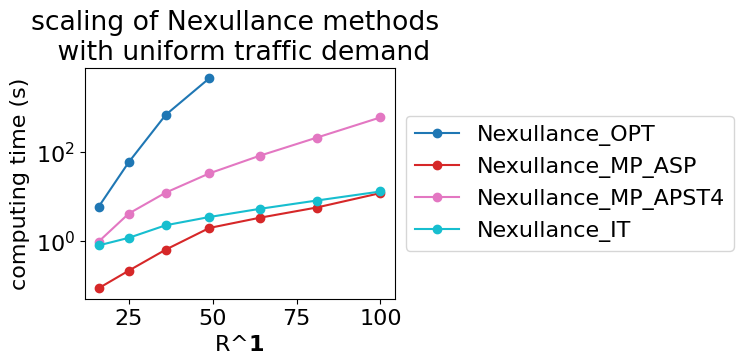

In [6]:
plot_for_traffic("uniform", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'])
plt.show()

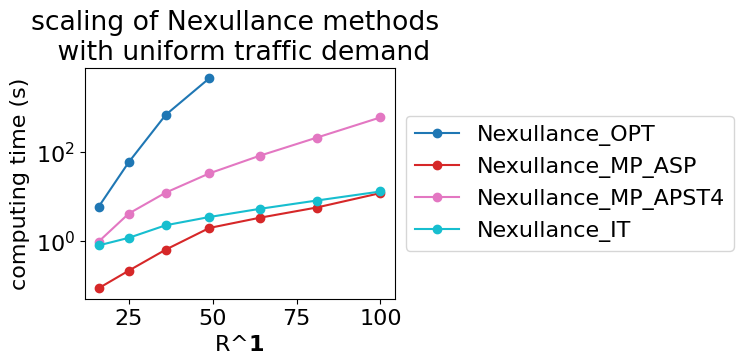

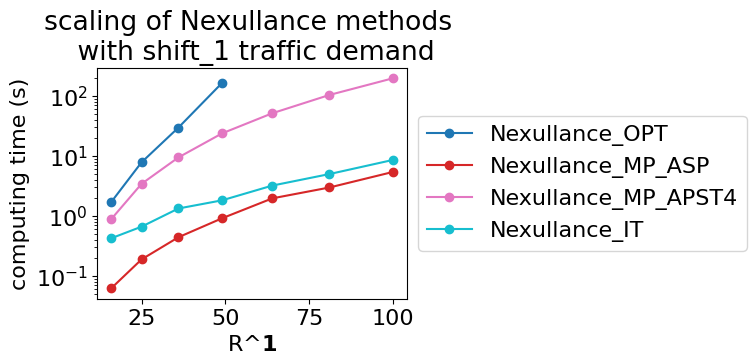

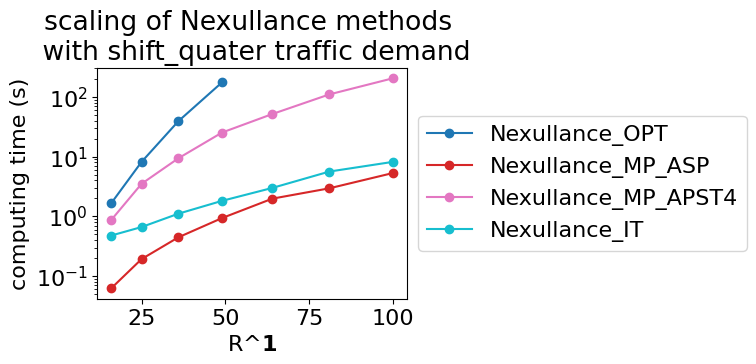

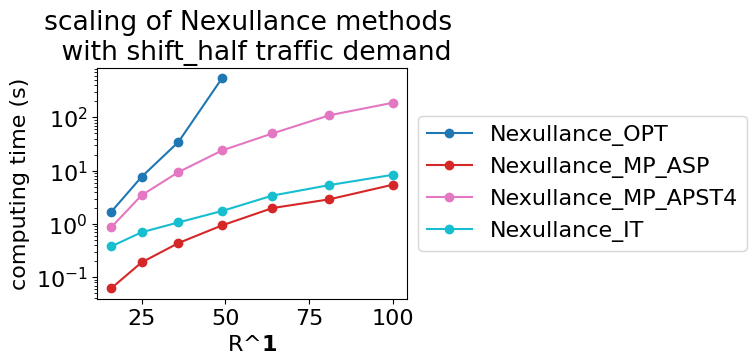

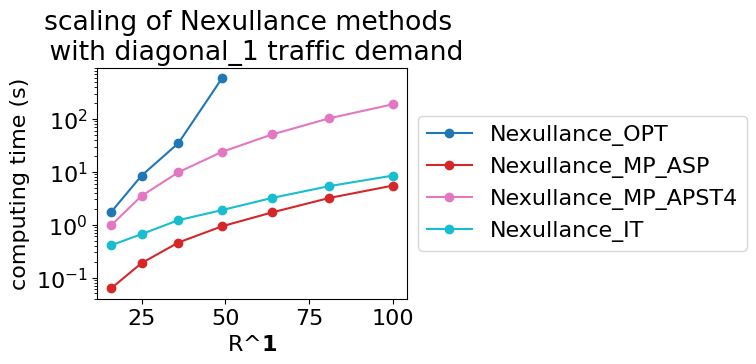

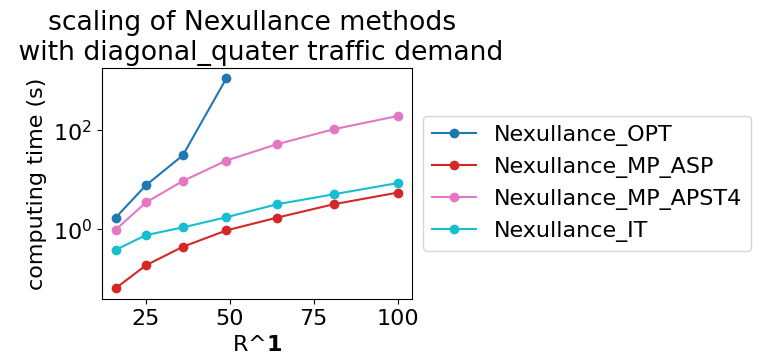

In [8]:
plot_for_traffic("uniform", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'])
plt.show()
plot_for_traffic("shift_1", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'])
plt.show()
plot_for_traffic("shift_quater", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'])
plt.show()
plot_for_traffic("shift_half", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'])
plt.show()
plot_for_traffic("diagonal_1", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'])
plt.show()
plot_for_traffic("diagonal_quater", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'])
plt.show()

In [ ]:
def plot_for_traffic(traffic_pattern, _methods, _x_power:int = 1, y_max: int = 0):
    _V = [ 16,  25,  36,  49,  64,  81, 100]
    plot_data={method: [] for method in _methods}
    for method in _methods:
        for v in _V:
            _values = raw_data[method][(raw_data[method]['V']==v) & (raw_data[method]['traffic_pattern']==traffic_pattern)]['_time'].values
            if len(_values):
                plot_data[method].append( _values[0] )
    plot_scaling_lines(_V, plot_data, None, "R^"+ r"$\bf{" + str(_x_power) + "}$", "computing time (s)", False, _x_power, y_max)

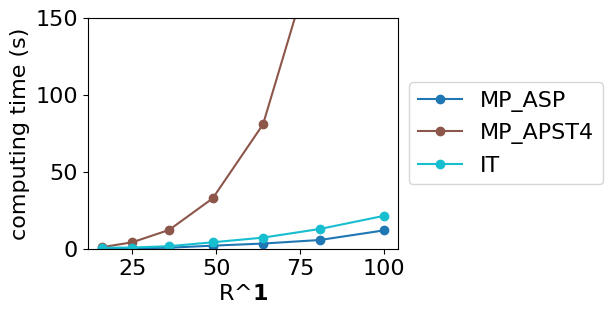

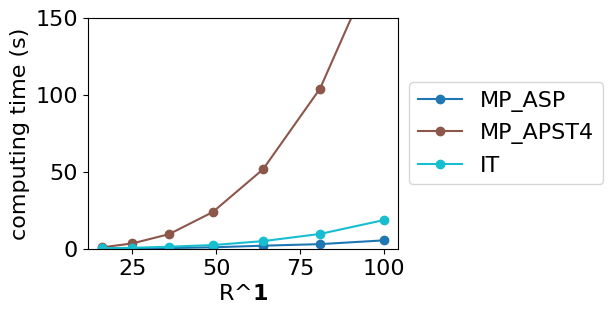

In [ ]:
methods_without_OPT = [x for x in methods if x != 'OPT']
plot_for_traffic("uniform", methods_without_OPT, 1, 150)
plt.show()
plot_for_traffic("shift_1", methods_without_OPT, 1, 150)
plt.show()
# plot_for_traffic("shift_quater", methods_without_OPT, 3)
# plt.show()
# plot_for_traffic("shift_half", methods_without_OPT, 3)
# plt.show()
# plot_for_traffic("diagonal_1", methods_without_OPT, 3)
# plt.show()
# plot_for_traffic("diagonal_quater", methods_without_OPT, 3)
# plt.show()

In [ ]:
plot_data={method: [] for method in methods}
for method in methods:
    v=49
    _values = raw_data[method][(raw_data[method]['V']==v) & (raw_data[method]['traffic_pattern']=='shift_1')]['_time'].values
    if len(_values):
        plot_data[method].append( _values[0] )

In [ ]:
plot_data

{'OPT': [164.7678873538971],
 'MP_ASP': [0.9139325618743896],
 'MP_APST4': [23.781225442886353],
 'IT': [2.385312557220459]}

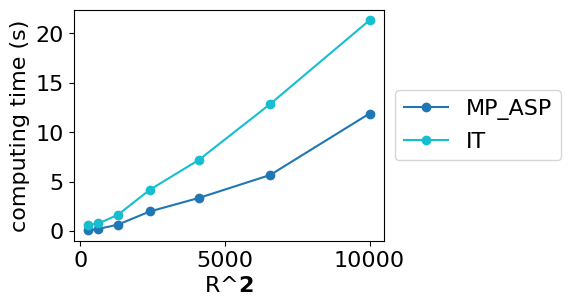

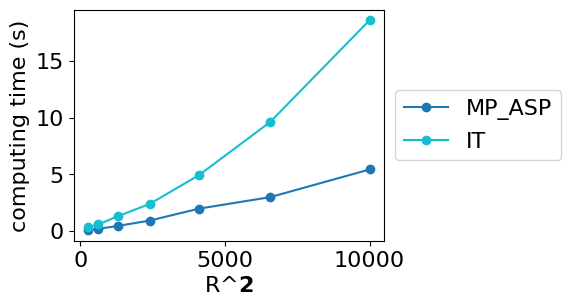

In [ ]:
# only method 2
methods_IT = [x for x in methods if x not in ['OPT', 'MP_APST4']]
plot_for_traffic("uniform", methods_IT,2)
plt.show()
plot_for_traffic("shift_1", methods_IT,2)
plt.show()

In [ ]:
# method_2 along scales ~ in between V^1 and V^2) 